In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import re


In [106]:
try:
    with open("Android.log") as fd:
        data = fd.readlines()
except Exception:
    print("file not found")

In [87]:

# Assuming 'data' contains the contents of the log file loaded using readlines()

# Define the regular expression pattern to extract log columns
pattern = r'(\d{2}-\d{2})\s(\d{2}:\d{2}:\d{2}.\d{3})\s+(\d+)\s+(\d+)\s+([A-Z])\s+(.+):\s+(.*)'

# Initialize lists to store extracted columns
columns = ['Date', 'Time', 'PID', 'TID', 'LogLevel', 'Tag', 'LogMessage']
extracted_data = []

# Iterate through each line in the log file data
for line in data:
    match = re.match(pattern, line)
    if match:
        extracted_data.append(match.groups())

# Create a Pandas DataFrame from the extracted data
log_df = pd.DataFrame(extracted_data, columns=columns)
print(log_df.tail())

          Date          Time   PID   TID LogLevel                Tag  \
1554936  12-18  19:53:49.399  2852  2852        I       ToggleSlider   
1554937  12-18  19:53:49.399  2852  2852        I       ToggleSlider   
1554938  12-18  19:53:49.406  1795  2750        I    HwLightsService   
1554939  12-18  19:53:49.406  1795  2750        D  HW_DISPLAY_EFFECT   
1554940  12-18  19:53:49.423  1795  2750        D  HW_DISPLAY_EFFECT   

                                                LogMessage  
1554936  mSeekListener onProgressChanged progress:1574 ...  
1554937  mSeekListener onProgressChanged progress:1574 ...  
1554938                  back light level before map = 534  
1554939  presently, hw_update_color_temp_for_rg_led int...  
1554940  presently, hw_update_color_temp_for_rg_led int...  


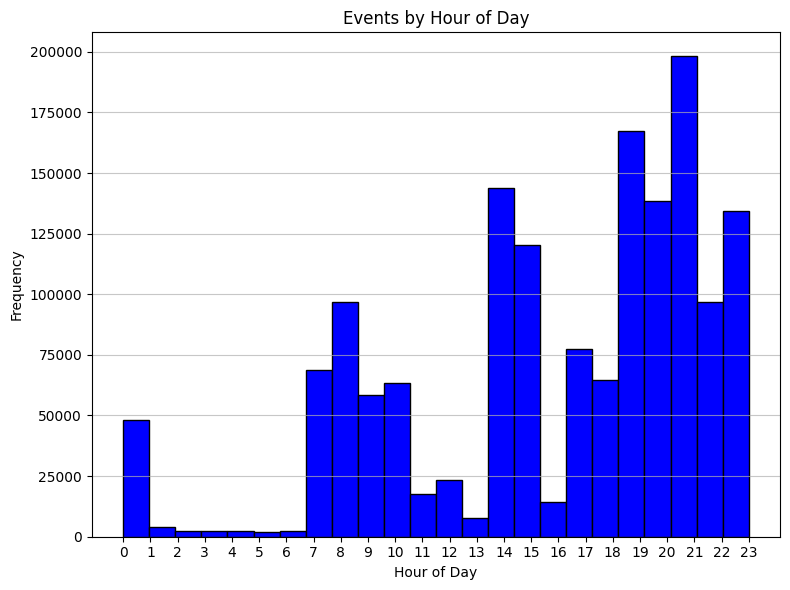

In [88]:
# Convert 'Time' column to datetime if it's in string format
log_df['Time'] = pd.to_datetime(log_df['Time'])

# Extract the hour from the 'Time' column
log_df['Hour'] = log_df['Time'].dt.hour

# Plot histogram
plt.figure(figsize=(8, 6))
log_df['Hour'].plot(kind='hist', bins=24, color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Events by Hour of Day')

# Set x-axis ticks and labels for better visibility
plt.xticks(range(24))

# Rotate x-axis labels if necessary (uncomment the line below)
# plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_9589/1084176304.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_counts = top_five_programs.append(pd.Series({'Other': other_count}))


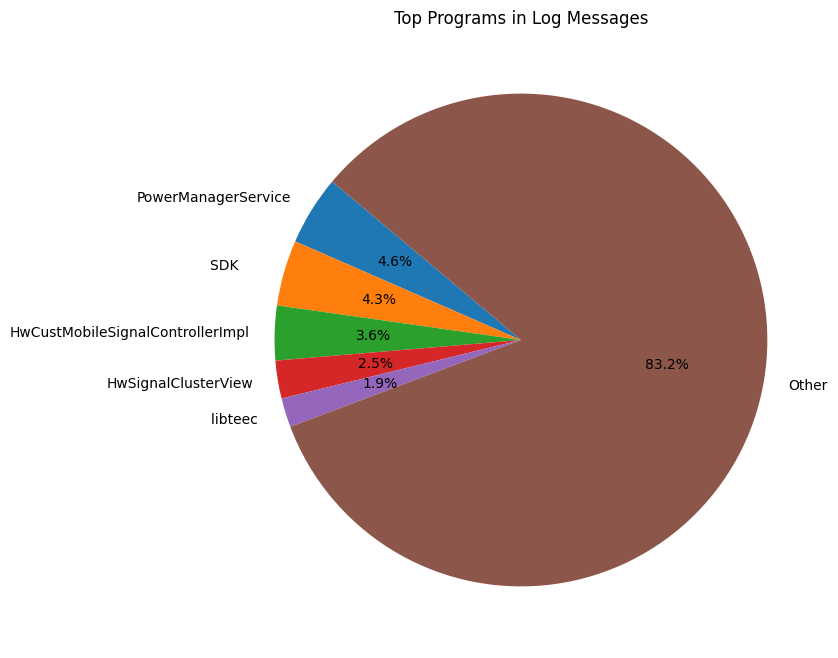

In [89]:
# Calculate frequencies of each program
program_counts = log_df['Tag'].value_counts()

# Identify top five programs by frequency
top_five_programs = program_counts.head(5)

# Calculate the sum of frequencies for programs not in the top five
other_count = program_counts.iloc[5:].sum()

# Combine top five programs and 'Other'
combined_counts = top_five_programs.append(pd.Series({'Other': other_count}))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Top Programs in Log Messages')
plt.show()

In [90]:
log_df.head()

,Date,Time,PID,TID,LogLevel,Tag,LogMessage,Hour
0,12-17,2023-12-03 19:31:36.263,1795,1825,I,PowerManager_screenOn: DisplayPowerStatesetCol...,level=1.0,19
1,12-17,2023-12-03 19:31:36.263,5224,5283,I,SendBroadcastPermission,action:android.com.huawei.bone.NOTIFY_SPORT_DA...,19
2,12-17,2023-12-03 19:31:36.264,1795,1825,D,DisplayPowerController: Animating brightness,"target=21, rate=40",19
3,12-17,2023-12-03 19:31:36.264,1795,1825,I,PowerManager_screenOn,DisplayPowerController updatePowerState mPendi...,19
4,12-17,2023-12-03 19:31:36.264,1795,2750,I,PowerManager_screenOn: DisplayPowerState Updat...,"state=ON, backlight=823",19


In [91]:
# Convert 'Time' column to datetime if it's in string format
log_df['Time'] = pd.to_datetime(log_df['Time'])
# Extract the hour from the 'Time' column
log_df['Hour'] = log_df['Time'].dt.hour

In [92]:
log_df.describe()

,Hour
count,1.554941e+06
mean,1.600503e+01
std,5.810258e+00
min,0.000000e+00
25%,1.200000e+01
50%,1.800000e+01
75%,2.100000e+01
max,2.300000e+01


In [93]:
# Divide the data into the first and second 12-hour periods
# Select data from hours 0 to 11
first_12_hours_data = log_df[log_df['Hour'].between(0, 11)]
second_12_hours_data = log_df[log_df['Hour'].between(
    12, 23)]  # Select data from hours 12 to 23


In [107]:
from scipy import stats

# Assuming first_12_hours_data and second_12_hours_data are your datasets
# Extract the 'Hour' data
hour_data_1 = first_12_hours_data['Hour']
hour_data_2 = second_12_hours_data['Hour']


# Assuming hour_data_1 and hour_data_2 are arrays with different lengths
t_statistic, p_value = stats.ttest_ind(
    hour_data_1, hour_data_2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in event counts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in event counts.")

T-Statistic: -1920.688925730464
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in event counts.


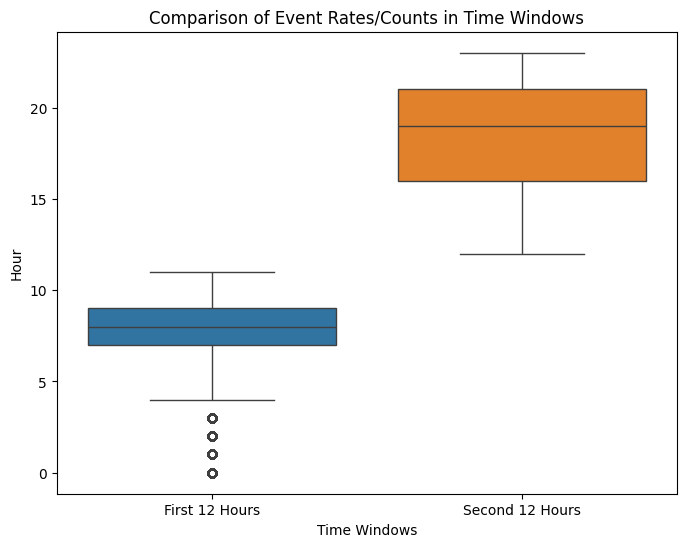

In [95]:
# Visualize the data using boxplots to compare event rates or counts in these time windows
import seaborn as sns
data = pd.DataFrame({'First 12 Hours': hour_data_1,
                    'Second 12 Hours': hour_data_2})

plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Comparison of Event Rates/Counts in Time Windows')
plt.xlabel('Time Windows')
plt.ylabel('Hour')
plt.show()

In [96]:
log_df.dtypes

Date                  object
Time          datetime64[ns]
PID                   object
TID                   object
LogLevel              object
Tag                   object
LogMessage            object
Hour                   int64
dtype: object

In [97]:
log_df.head()

,Date,Time,PID,TID,LogLevel,Tag,LogMessage,Hour
0,12-17,2023-12-03 19:31:36.263,1795,1825,I,PowerManager_screenOn: DisplayPowerStatesetCol...,level=1.0,19
1,12-17,2023-12-03 19:31:36.263,5224,5283,I,SendBroadcastPermission,action:android.com.huawei.bone.NOTIFY_SPORT_DA...,19
2,12-17,2023-12-03 19:31:36.264,1795,1825,D,DisplayPowerController: Animating brightness,"target=21, rate=40",19
3,12-17,2023-12-03 19:31:36.264,1795,1825,I,PowerManager_screenOn,DisplayPowerController updatePowerState mPendi...,19
4,12-17,2023-12-03 19:31:36.264,1795,2750,I,PowerManager_screenOn: DisplayPowerState Updat...,"state=ON, backlight=823",19


In [101]:
# Convert 'Date' and 'Time' columns to datetime format
log_df['DateTime'] = log_df['Date'] + \
    pd.to_timedelta(log_df['Time'].dt.strftime('%H:%M:%S'))

# Filter data for 'SendBroadcastPermission' and 'ActivityManager' logs
send_broadcast = log_df[log_df['Tag'].str.contains('SendBroadcastPermission')]
activity_manager = log_df[log_df['Tag'].str.contains('ActivityManager')]

# Resample data in 5-minute intervals and calculate event rates
send_broadcast_rates = send_broadcast.resample('5T', on='DateTime').size()
activity_manager_rates = activity_manager.resample('5T', on='DateTime').size()

/tmp/ipykernel_9589/3783015080.py:4: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  log_df['DateTime'] = log_df['Date'] + \


In [102]:
send_broadcast_rates

DateTime
-1 days +23:59:59.999998782    124
0 days 00:04:59.999998782      176
0 days 00:09:59.999998782      154
0 days 00:14:59.999998782      164
0 days 00:19:59.999998782      144
                              ... 
0 days 23:34:59.999998782      143
0 days 23:39:59.999998782      116
0 days 23:44:59.999998782      167
0 days 23:49:59.999998782      136
0 days 23:54:59.999998782      116
Freq: 5T, Length: 288, dtype: int64

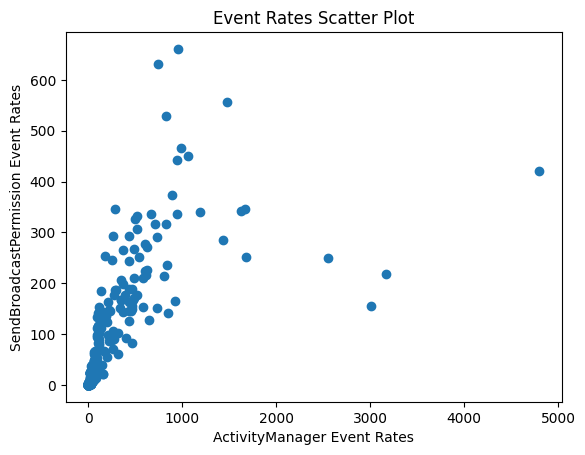

In [103]:
import matplotlib.pyplot as plt

plt.scatter(activity_manager_rates, send_broadcast_rates)
plt.xlabel('ActivityManager Event Rates')
plt.ylabel('SendBroadcastPermission Event Rates')
plt.title('Event Rates Scatter Plot')
plt.show()

Intercept: 47.52347466337382
Coefficient: [0.16209725]
R-squared: 0.43655017449341504


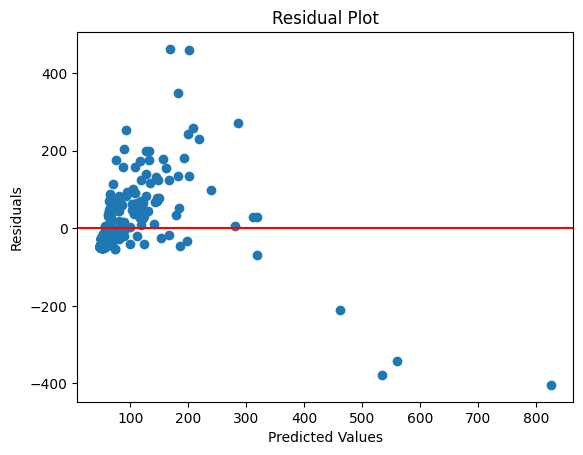

In [104]:
from sklearn.linear_model import LinearRegression

# Reshape data for fitting the model
X = activity_manager_rates.values.reshape(-1, 1)
y = send_broadcast_rates.values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model summary
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')
print(f'R-squared: {model.score(X, y)}')

# Make predictions
predictions = model.predict(X)

# Plot residuals
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()